Importing modules

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Importing Data

In [ ]:
df=pd.read_csv('dataa.csv')

## Viewing Data

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df=pd.read_csv("dataa.csv",index_col="customerID")

In [ ]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.shape

(7043, 20)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Data Cleaning

In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

Converting dtype of TotalCharges to Float

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [ ]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

The Dataset has 20 columns and 7043 rows with no empty(NULL) value

In [ ]:
df.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

There are missing values in the column TotalCharges

In [ ]:
#Finding the average and filling the missing values
na_cols = df.isna().any()
na_cols = na_cols[na_cols == True].reset_index() #reset the index of the columnn with wrong datatype or True value
na_cols = na_cols["index"].tolist()
for col in df.columns[1:]:
     if col in na_cols:
        if df[col].dtype != 'object':
             df[col] =  df[col].fillna(df[col].mean()).round(0) #finding average and filling the missing values

To revalidate :-

In [ ]:
df.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

Now no column has missing values

In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges', 'TotalCharges'], object: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']}

Replacing similar values

In [ ]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [ ]:
yes_no = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [ ]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
6840-RESVB,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.0,0
2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7363.0,0
4801-JZAZL,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.0,0
8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,307.0,1
3186-AJIEK,Male,0,0,0,66,1,0,Fiber optic,1,0,1,1,1,1,Two year,1,Bank transfer (automatic),105.65,6844.0,0


# Analysing Data

Let us plot Histograms

In [ ]:
df2 = df.sample(frac=0.15)

In [ ]:
df2.shape

(1056, 20)

Text(0.5, 0.98, '\nHistograms\n')

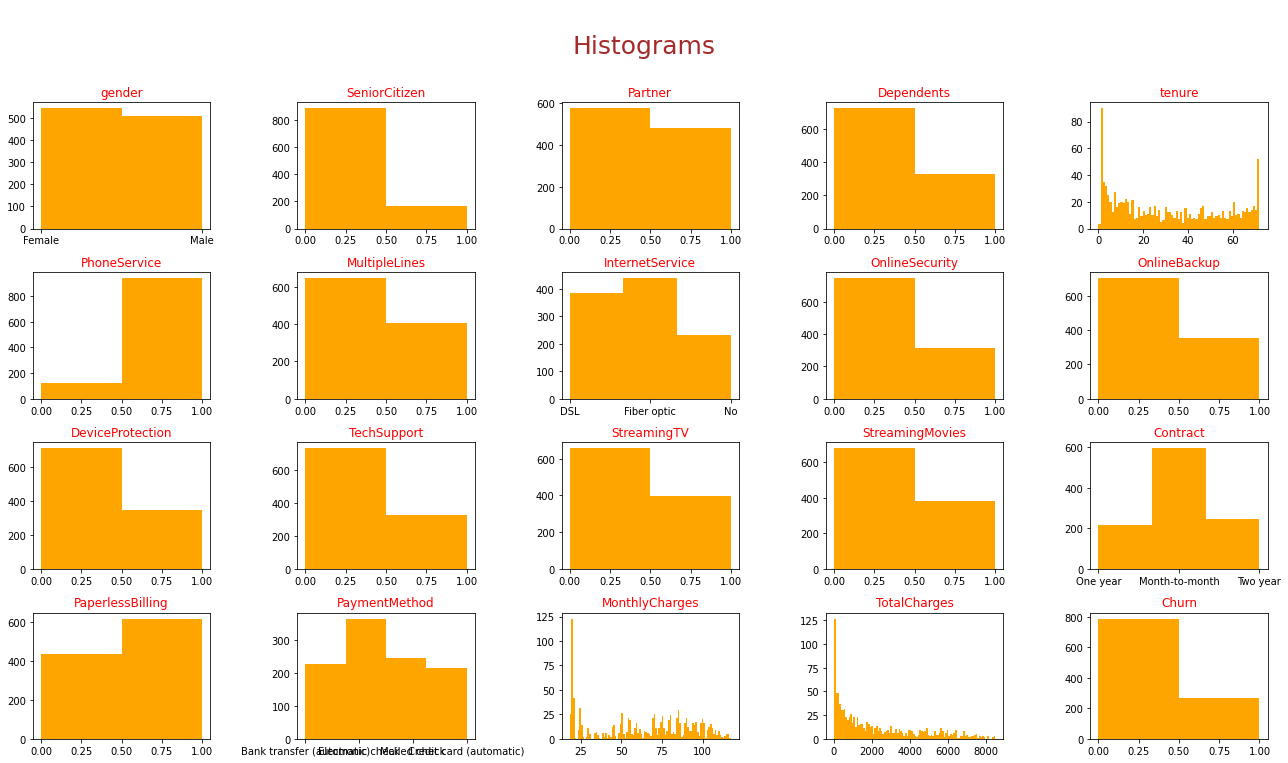

In [ ]:
fig = plt.figure(figsize=(18, 12))

for i in range(df2.shape[1]):
    plt.subplot(4, 5, i + 1)
    f = plt.gca()
    f.set_title(df2.columns.values[i],color='red')

    vals = np.size(df2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(df2.iloc[:, i], bins=vals, color = 'orange')
plt.tight_layout(rect=[0, 0.1, 1, 0.9])
plt.suptitle('\nHistograms\n',fontsize=25,color='brown')

Category Plot for comparison

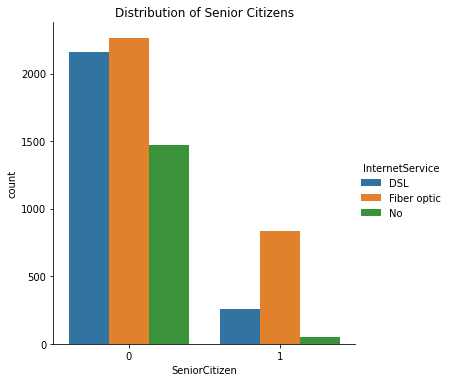

In [ ]:
sns.catplot(x = "SeniorCitizen", hue="InternetService", kind="count", data=df)
plt.title('Distribution of Senior Citizens');
plt.show()

Count Plot for number

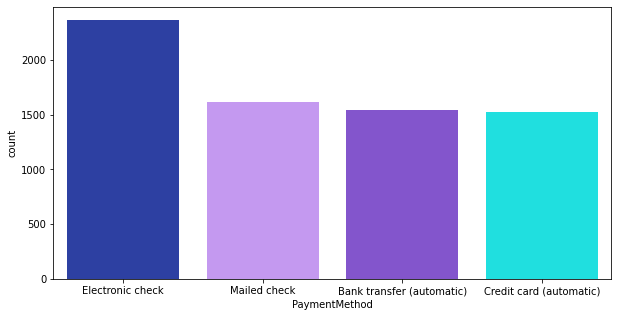

In [ ]:
plt.figure(1, figsize=(10,5))
a=['#1933b5','#c48aff','#7e41e0','cyan'] 
sns.countplot(x ="PaymentMethod",palette=a, data=df)
plt.show()

Violin Plots for seeing highest occurence

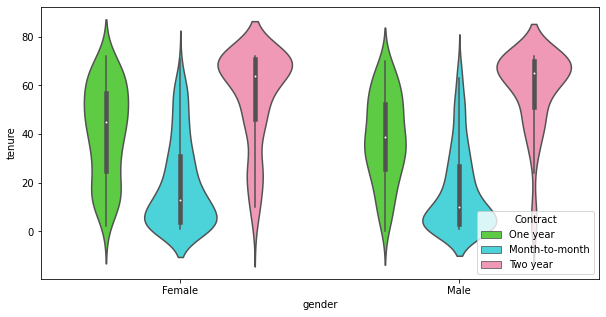

In [ ]:
fig = plt.figure(figsize=(10, 5))
a=['#4fe32d','#35e9f0','#ff8ab1']
sns.violinplot(y = "tenure", x = "gender", hue="Contract",palette=a, data = df2)
plt.show()

Histogram of monthly charges by gender

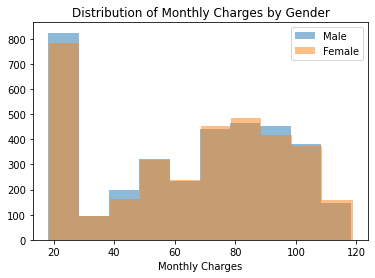

In [ ]:
plt.hist('MonthlyCharges', data=df[df['gender'] == 'Male'], alpha=0.5, label='Male')
plt.hist('MonthlyCharges', data=df[df['gender'] == 'Female'], alpha=0.5, label='Female')
plt.title('Distribution of Monthly Charges by Gender')
plt.xlabel('Monthly Charges')
plt.legend()
plt.show()

Relation plot between Monthly Charges and Tenure with respect to Total Charges

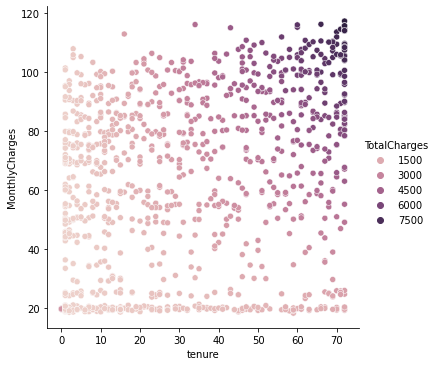

In [ ]:
sns.relplot(x="tenure",hue="TotalCharges",y="MonthlyCharges",data=df2)
plt.show()

Heatmap for correlation

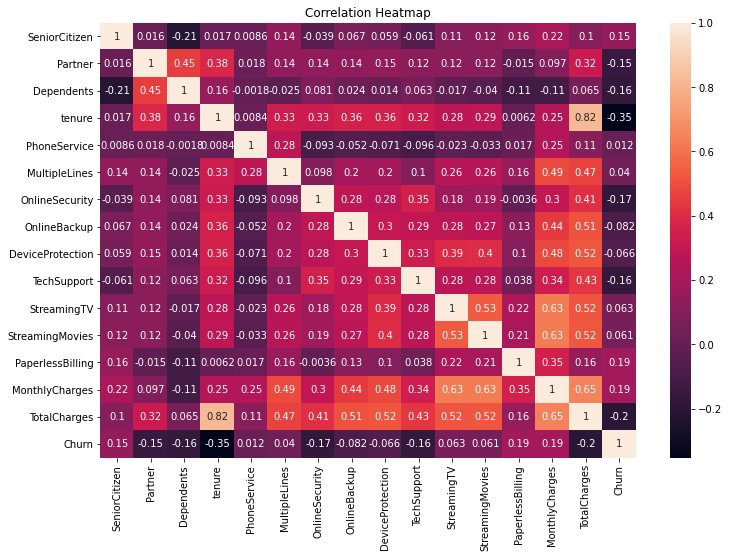

In [ ]:
plt.figure(1, figsize=(12,8))
sns.heatmap(df.corr(), annot=True);
plt.title('Correlation Heatmap');

Countplot of the columns with most variation

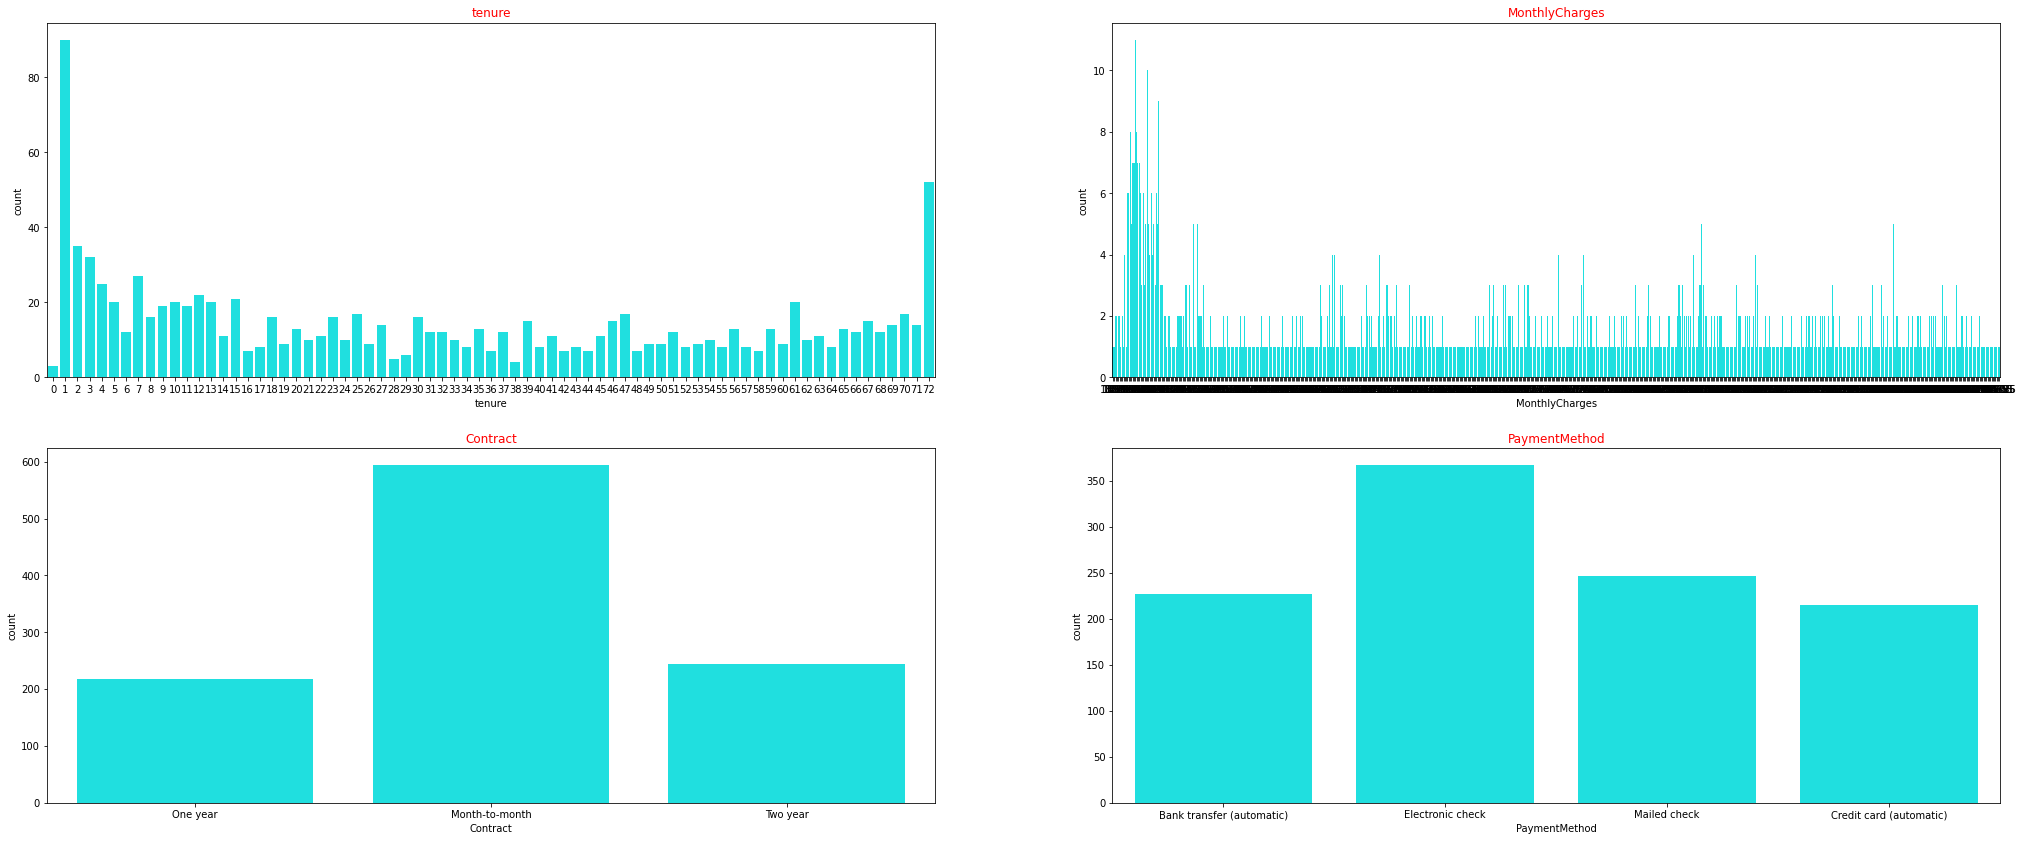

In [ ]:
df3=df2[['tenure','MonthlyCharges','Contract','PaymentMethod']]
plt.figure(1, figsize=(35,30))
for i in range(df3.shape[1]):
    plt.subplot(4, 2, i + 1)
    f = plt.gca()
    f.set_title(df3.columns.values[i],color='red')
    
    sns.countplot(df3.iloc[:,i], color = 'cyan')
plt.show()

Finding K for KMeans Clustering

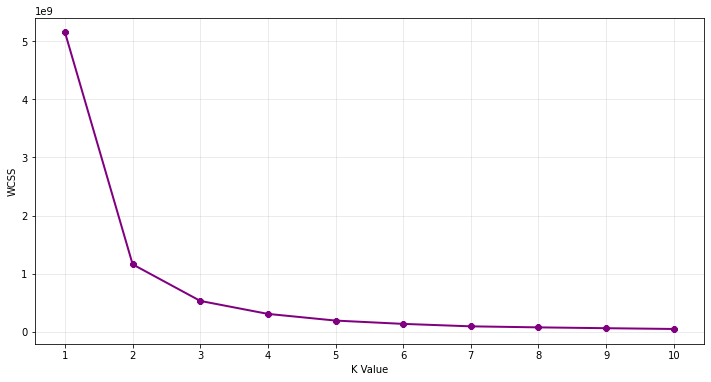

In [ ]:
df4=df2[['tenure','MonthlyCharges','TotalCharges']]
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df4.iloc[:,0:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid(alpha=0.3)
plt.plot(range(1,11),wcss, linewidth=2, color="purple", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

K comes out to be 3, i.e. number of clusters=3

In [ ]:
X1=df4.iloc[:,0:].values
kmeans=KMeans(n_clusters=3)
label=kmeans.fit_predict(X1)
print(label)

[0 2 0 ... 0 2 0]


In [ ]:
print(kmeans.cluster_centers_)

[[  41.25468165   72.42752809 2819.93258427]
 [  62.85507246   95.50724638 5992.19806763]
 [  15.81271478   47.51804124  572.1975945 ]]


2-D Scatter Plot for clusters

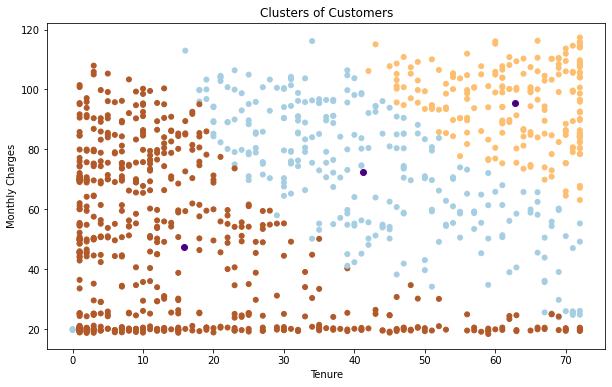

In [ ]:
plt.figure(1, figsize=(10,6))
plt.scatter(X1[:,0],X1[:,1],s=25,c=kmeans.labels_,cmap=plt.cm.Paired)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='indigo')
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
plt.title('Clusters of Customers')
plt.show()


3-D Scatter Plot for clusters

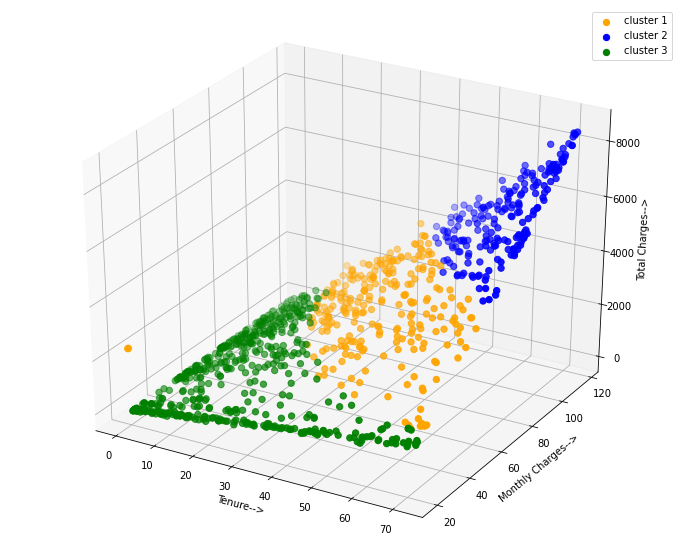

In [ ]:
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1[label == 0,0],X1[label == 0,1],X1[label == 0,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(X1[label == 1,0],X1[label == 1,1],X1[label == 1,2], s = 40 , color = 'blue', label = "cluster 2")
ax.scatter(X1[label == 2,0],X1[label == 2,1],X1[label == 2,2], s = 40 , color = 'green', label = "cluster 3")
ax.set_xlabel('Tenure-->')
ax.set_ylabel('Monthly Charges-->')
ax.set_zlabel('Total Charges-->')
ax.legend()
plt.show()